## Python Implementation Visit.
For More Documentation

--> https://scikit-learn.org/stable/index.html

## Problem Statement
Based on the Pima Indians Hospital diabetes data , build Machine Learning binary classification model to predict if the person diabetic or Not based on below

##### Features
Pregnancies

Glucose

BloodPressure

SkinThinckness

Insulin

BMI

Diabetespedigreefunction

Age

##### Label
Outcome

In [426]:
#Lets Start with importing necessary Libraries 


import pandas as pd
import numpy as np


#For Data Visualization


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [428]:
db_data=pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\diabetes.csv")
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [430]:
#1=Yes
#0=No
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [432]:
db_data.shape

(768, 9)

In [434]:
#No null values present
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [436]:
#In pregnanies, max=17 pregnancies is not possible. Therefore, it is an outlier.

## Data Preprocessing (Analysis(EDA))

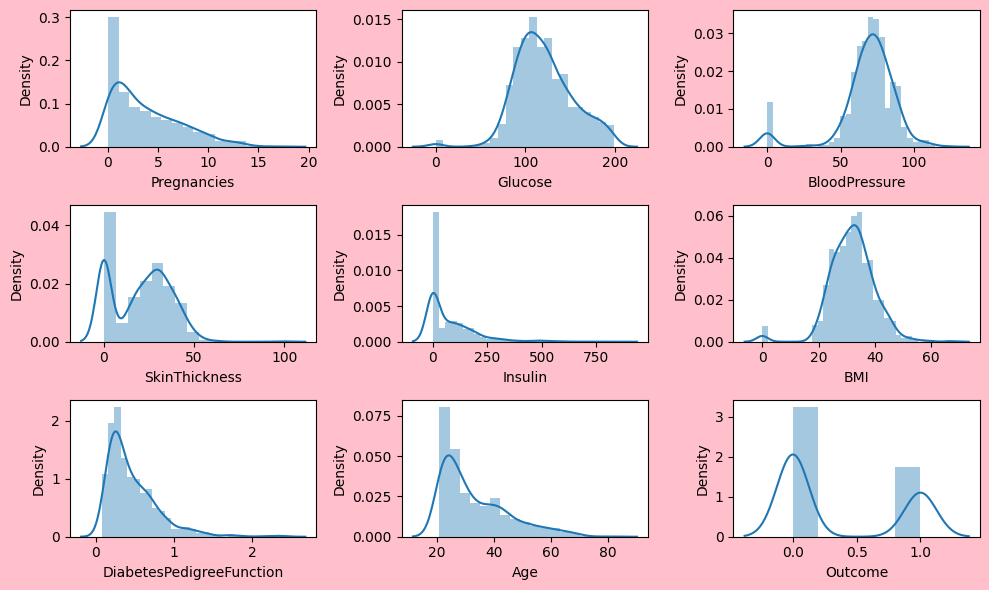

In [439]:
#Lets see how data is distributed for every column.
plt.figure(figsize=(10,6),facecolor='pink')
graph=1
for column in db_data:
    if graph <=9:
        ax=plt.subplot(3,3,graph)
        sns.distplot(db_data[column])
        plt.xlabel(column)
    graph +=1
    
plt.tight_layout()
plt.show()

We can see that there is some skewness in the data. Let's address this issue.

Additionally, we notice that some columns—such as Glucose, Insulin, Skin Thickness, BMI, and Blood Pressure—contain values of 0, which is not possible. A quick search confirms that these variables should not have 0 values. We can handle this by either removing these data points or replacing them with their respective mean values. Let's proceed with the latter approach.

In [441]:
#replacing zero values with the mean of the column 
#i am going to use low risk method its mean method 
#treating zeros


db_data['BMI']=db_data['BMI'].replace(0,db_data['BMI'].mean())
db_data['Insulin']=db_data['Insulin'].replace(0,db_data['Insulin'].mean())
db_data['BloodPressure']=db_data['BloodPressure'].replace(0,db_data['BloodPressure'].mean())
db_data['Glucose']=db_data['Glucose'].replace(0,db_data['Glucose'].mean())
db_data['SkinThickness']=db_data['SkinThickness'].replace(0,db_data['SkinThickness'].mean())

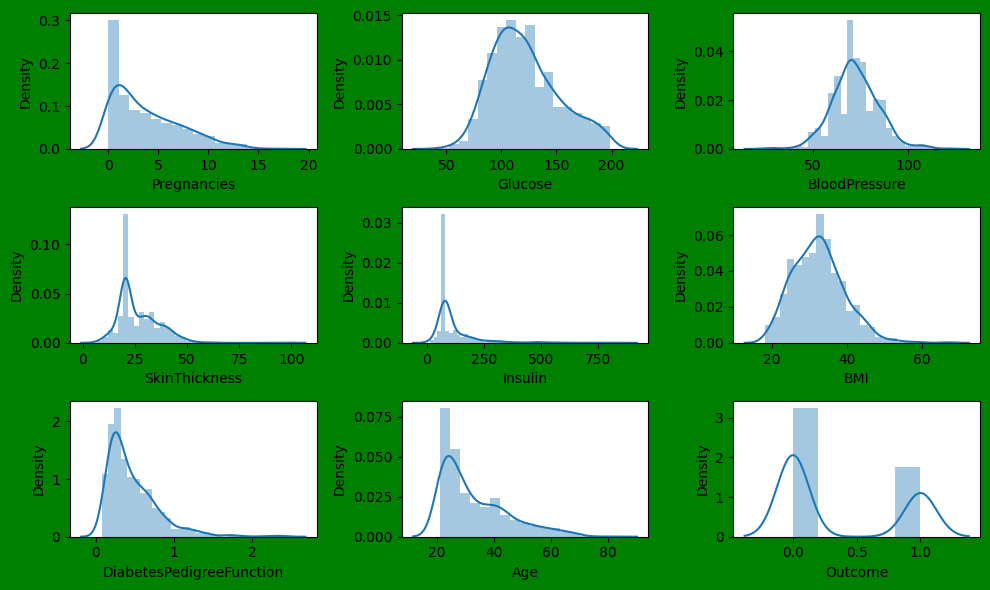

In [442]:
#Lets see how data is distributed for every column
plt.figure(figsize=(10,6),facecolor='green')
graph=1
for column in db_data:
    if graph <=9:
        ax=plt.subplot(3,3,graph)
        sns.distplot(db_data[column])
        plt.xlabel(column,fontsize=10)
    graph +=1
plt.tight_layout()
plt.show()

Now we have to deal with the 0 values and graph looks better. But there are outliers present in some columns. Lets deal with them.

In [446]:
#remove the label column so data looks clean
db_feature = db_data.drop('Outcome',axis=1)

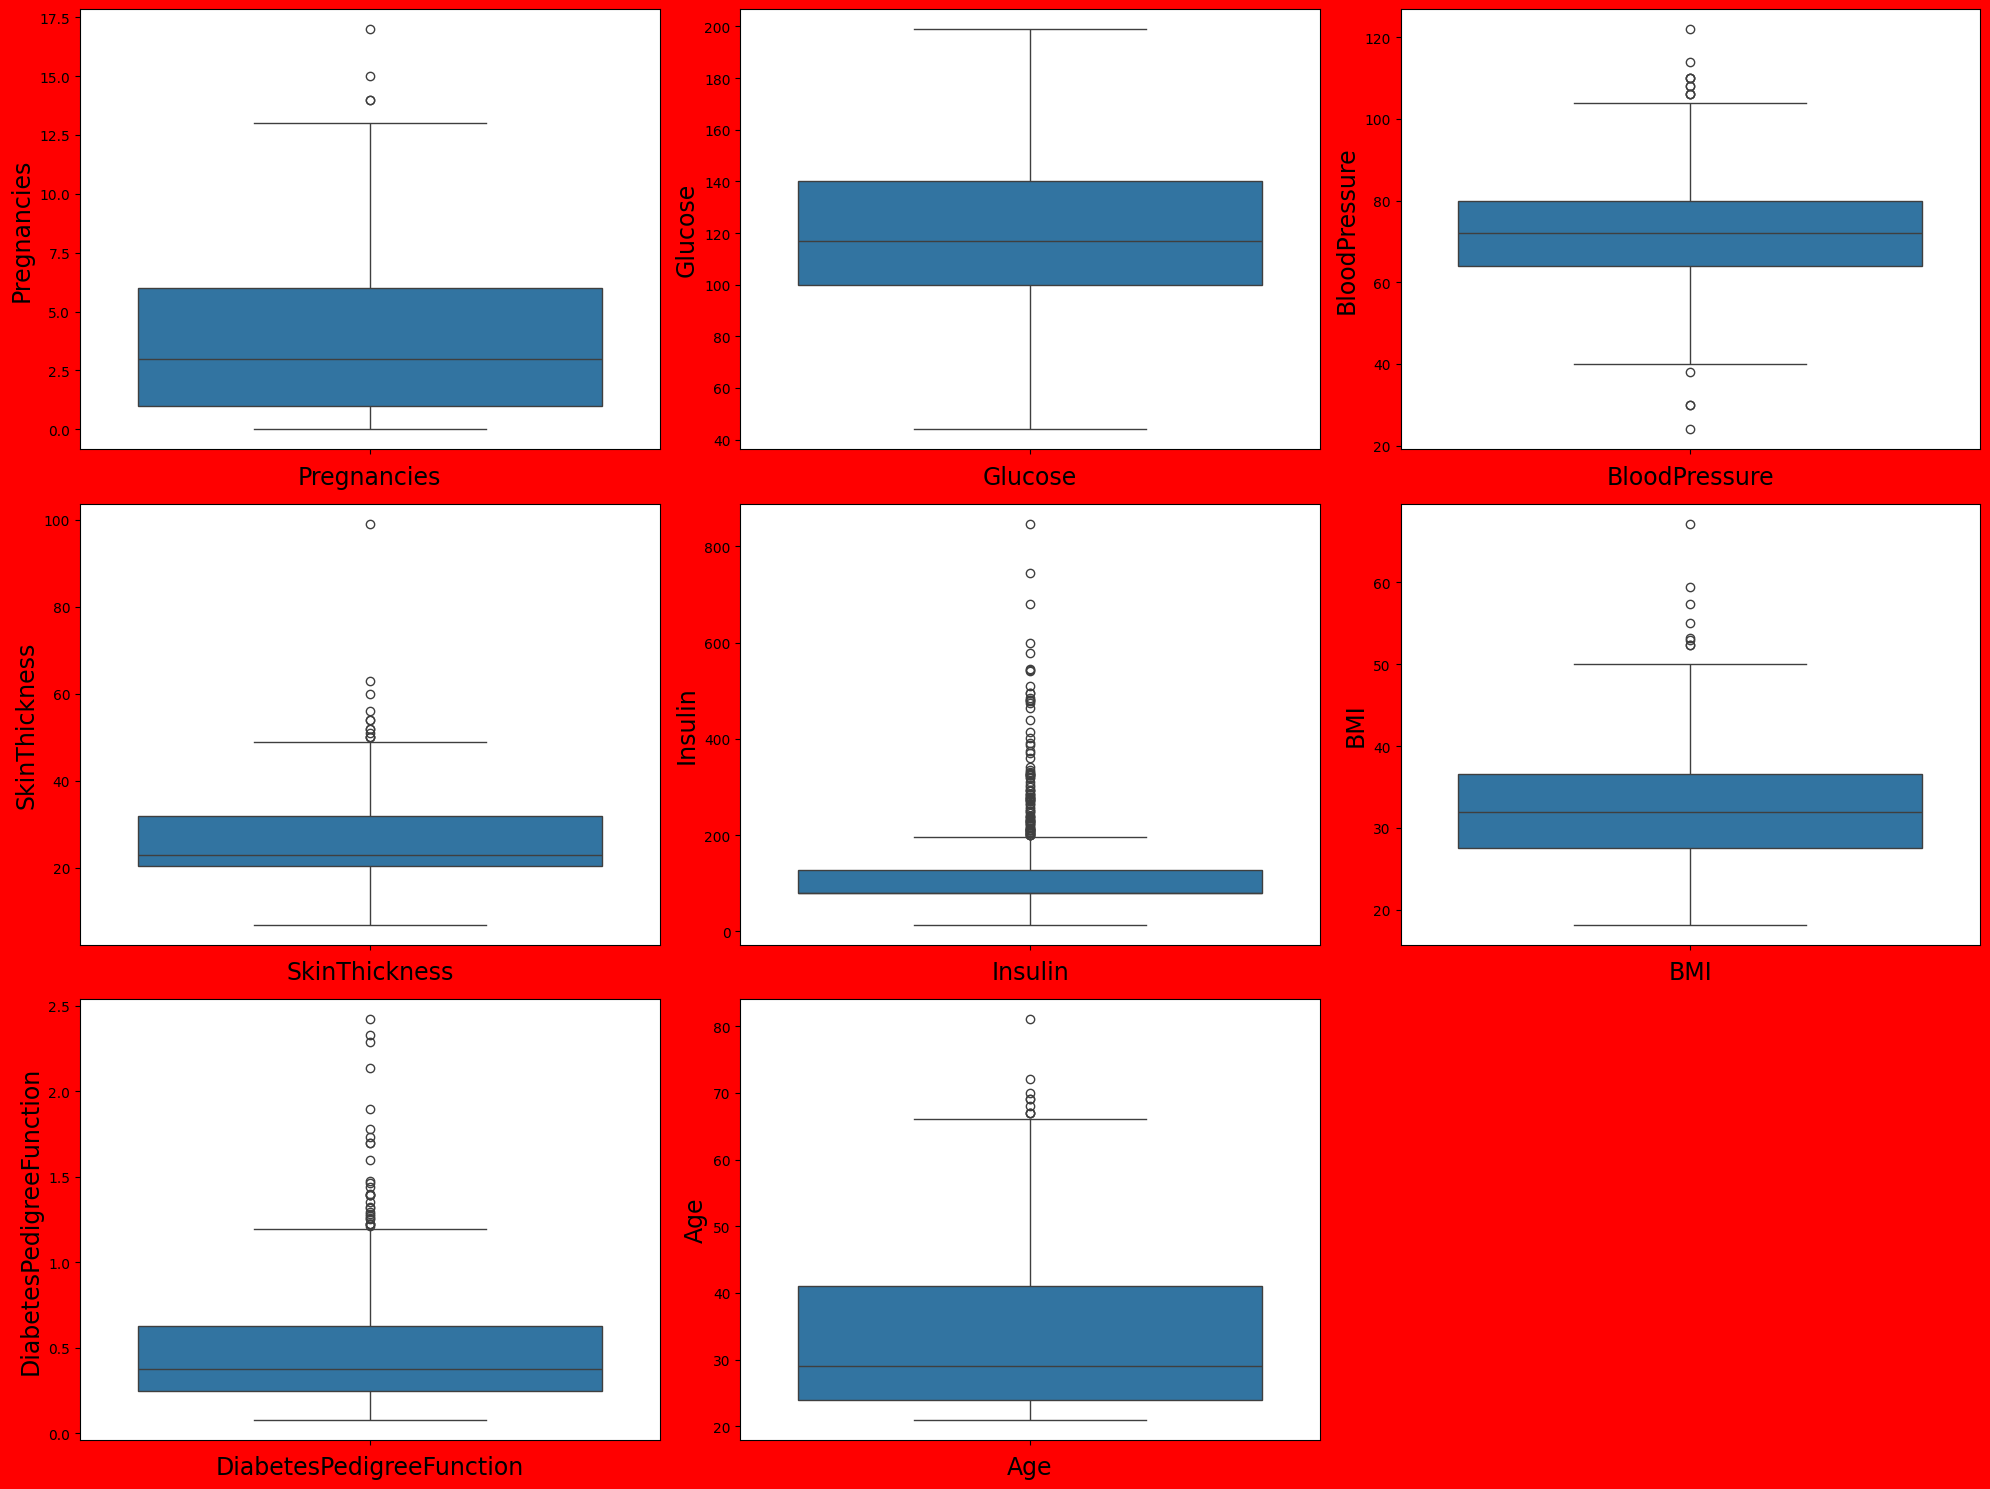

In [447]:
# Visualise the outliers using boxlot

plt.figure(figsize=(20,15), facecolor = "red")

plotnumber = 1

for column in db_feature:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data = db_feature[column])
        plt.xlabel(column, fontsize = 17)
        plt.ylabel(column, fontsize = 17)
    plotnumber += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [448]:
# Find the IQR (inter quantile range) to identify outliers.

q1 = db_data.quantile(0.25) # 1st quantile
q3 = db_data.quantile(0.75) # 3rd quantile

iqr = q3 - q1

#### OutLiers Detection Formula
Higher side ==> Q3 + (1.5 * IQR)

Lower Side ==> Q1 - (1.5 * IQR)

In [452]:
print('First Quartile:\n','-'*40)
print(q1, '\n','-'*40)
print('\nThird Quartile:\n','-'*40)
print(q3, '\n','-'*40)
print('\nInter Quartile Ranger:\n','-'*40)
print(iqr, '\n','-'*40)

First Quartile:
 ----------------------------------------
Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64 
 ----------------------------------------

Third Quartile:
 ----------------------------------------
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64 
 ----------------------------------------

Inter Quartile Ranger:
 ----------------------------------

In [542]:
# Create a function to detect and drop outliers from each column:

def outliers(db_data, column):

    new_data = db_data.copy()
    
    # Calculate Q1, Q3, and IQR
    q1 = new_data[column].quantile(0.25)
    q3 = new_data[column].quantile(0.75)
    iqr = q3 - q1

    # Define outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Detect Outliers
    outliers = new_data[(new_data[column]< lower_bound) | (new_data[column] > upper_bound)]
    print('Outliers:\n', outliers[column].values)

    # Remove the outliers and save the data back in the dataframe
    new_data = new_data[(new_data[column] >= lower_bound) & (new_data[column] <= upper_bound)]

    # Reset index
    new_data = new_data.reset_index(drop=True)

    return new_data

In [544]:
import pandas as pd

clean_data = outliers(db_data, column='Pregnancies')
clean_data

Outliers:
 [15 17 14 14]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
759,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [546]:
clean_data = outliers(db_data, column='Glucose')
clean_data

Outliers:
 []


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [548]:
clean_data = outliers(db_data, column='BloodPressure')
clean_data

Outliers:
 [ 30. 110. 108. 122.  30. 110. 108. 110.  24.  38. 106. 106. 106. 114.]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
749,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [550]:
clean_data = outliers(db_data, column='SkinThickness')
clean_data

Outliers:
 [60. 54. 51. 56. 50. 54. 50. 52. 63. 52. 99. 50.]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
751,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
752,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
753,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
754,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [552]:
clean_data = outliers(db_data, column='Insulin')
clean_data

Outliers:
 [543. 846. 230. 235. 245. 207. 240. 300. 342. 304. 270. 228. 220. 495.
 225. 325. 284. 204. 485. 285. 495. 210. 318. 280. 271. 478. 744. 370.
 680. 402. 258. 375. 278. 545. 220. 360. 215. 205. 231. 255. 249. 325.
 293. 465. 325. 285. 415. 275. 579. 310. 474. 210. 277. 210. 237. 328.
 250. 480. 265. 210. 326. 210. 215. 225. 207. 215. 274. 330. 600. 230.
 293. 272. 321. 440. 540. 200. 231. 240. 265. 205. 480. 200. 335. 387.
 291. 392. 200. 200. 510.]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
674,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
675,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
676,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
677,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [554]:
clean_data = outliers(db_data, column='BMI')
clean_data

Outliers:
 [53.2 55.  67.1 52.3 52.3 52.9 59.4 57.3]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
755,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
756,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
757,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
758,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [556]:
clean_data = outliers(db_data, column='DiabetesPedigreeFunction')
clean_data

Outliers:
 [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
734,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
735,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
736,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
737,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [558]:
clean_data = outliers(db_data, column='Age')
clean_data

Outliers:
 [69 67 72 81 67 67 70 68 69]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
754,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
755,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
756,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
757,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


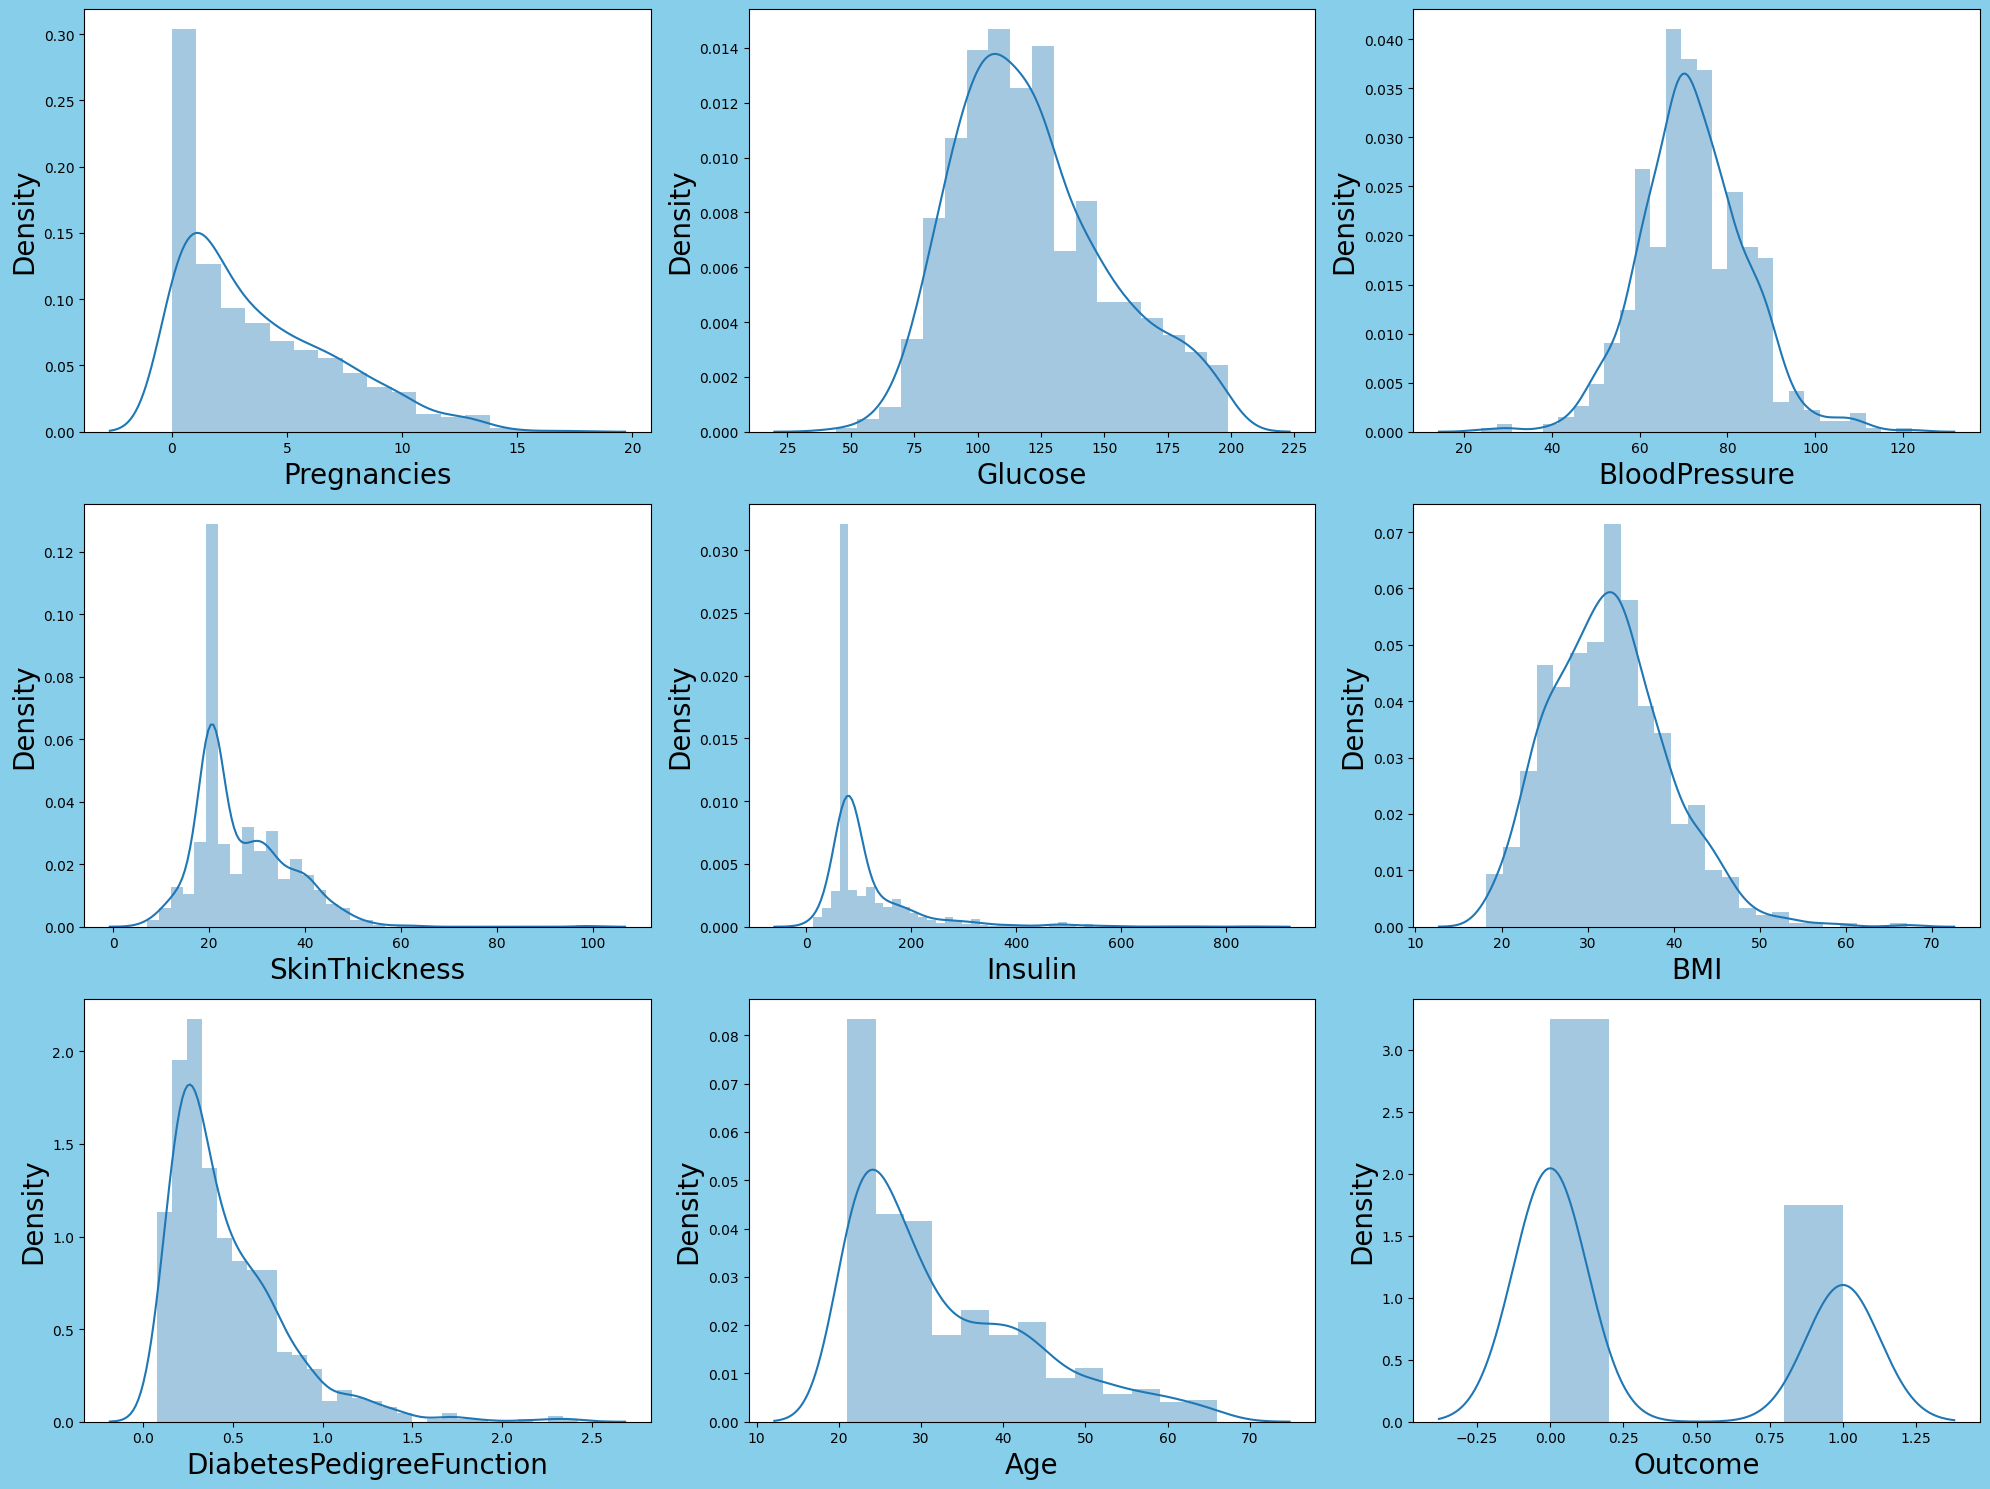

In [566]:
# Visualise the data using distplot

plt.figure(figsize=(20,15),facecolor='SkyBlue')

plotnumber = 1

for column in clean_data.columns:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(clean_data[column], kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density' ,fontsize=20)
    
    plotnumber +=1
    
plt.tight_layout()
plt.show()

Spread of Data: The density plots after outlier removal are more concentrated around the central values, indicating that extreme values (outliers) have been removed.

Range of Values: The range of values in the density plots after outlier removal is narrower, as outliers (extreme values) have been excluded.

Shape of Distribution: The distributions after outlier removal are smoother and more symmetric, as the influence of extreme values has been reduced.

### Finding Relationship: We want to keep only those features which have relationship with label.

In [570]:
x = clean_data.drop(columns=['Outcome'])

y = clean_data.Outcome

Before we fit our data to a model lets Visualize the relationship between our independent variables and the categories.

Categorical data plotting, when we are plotting stripplot, first we have to write label then feature.

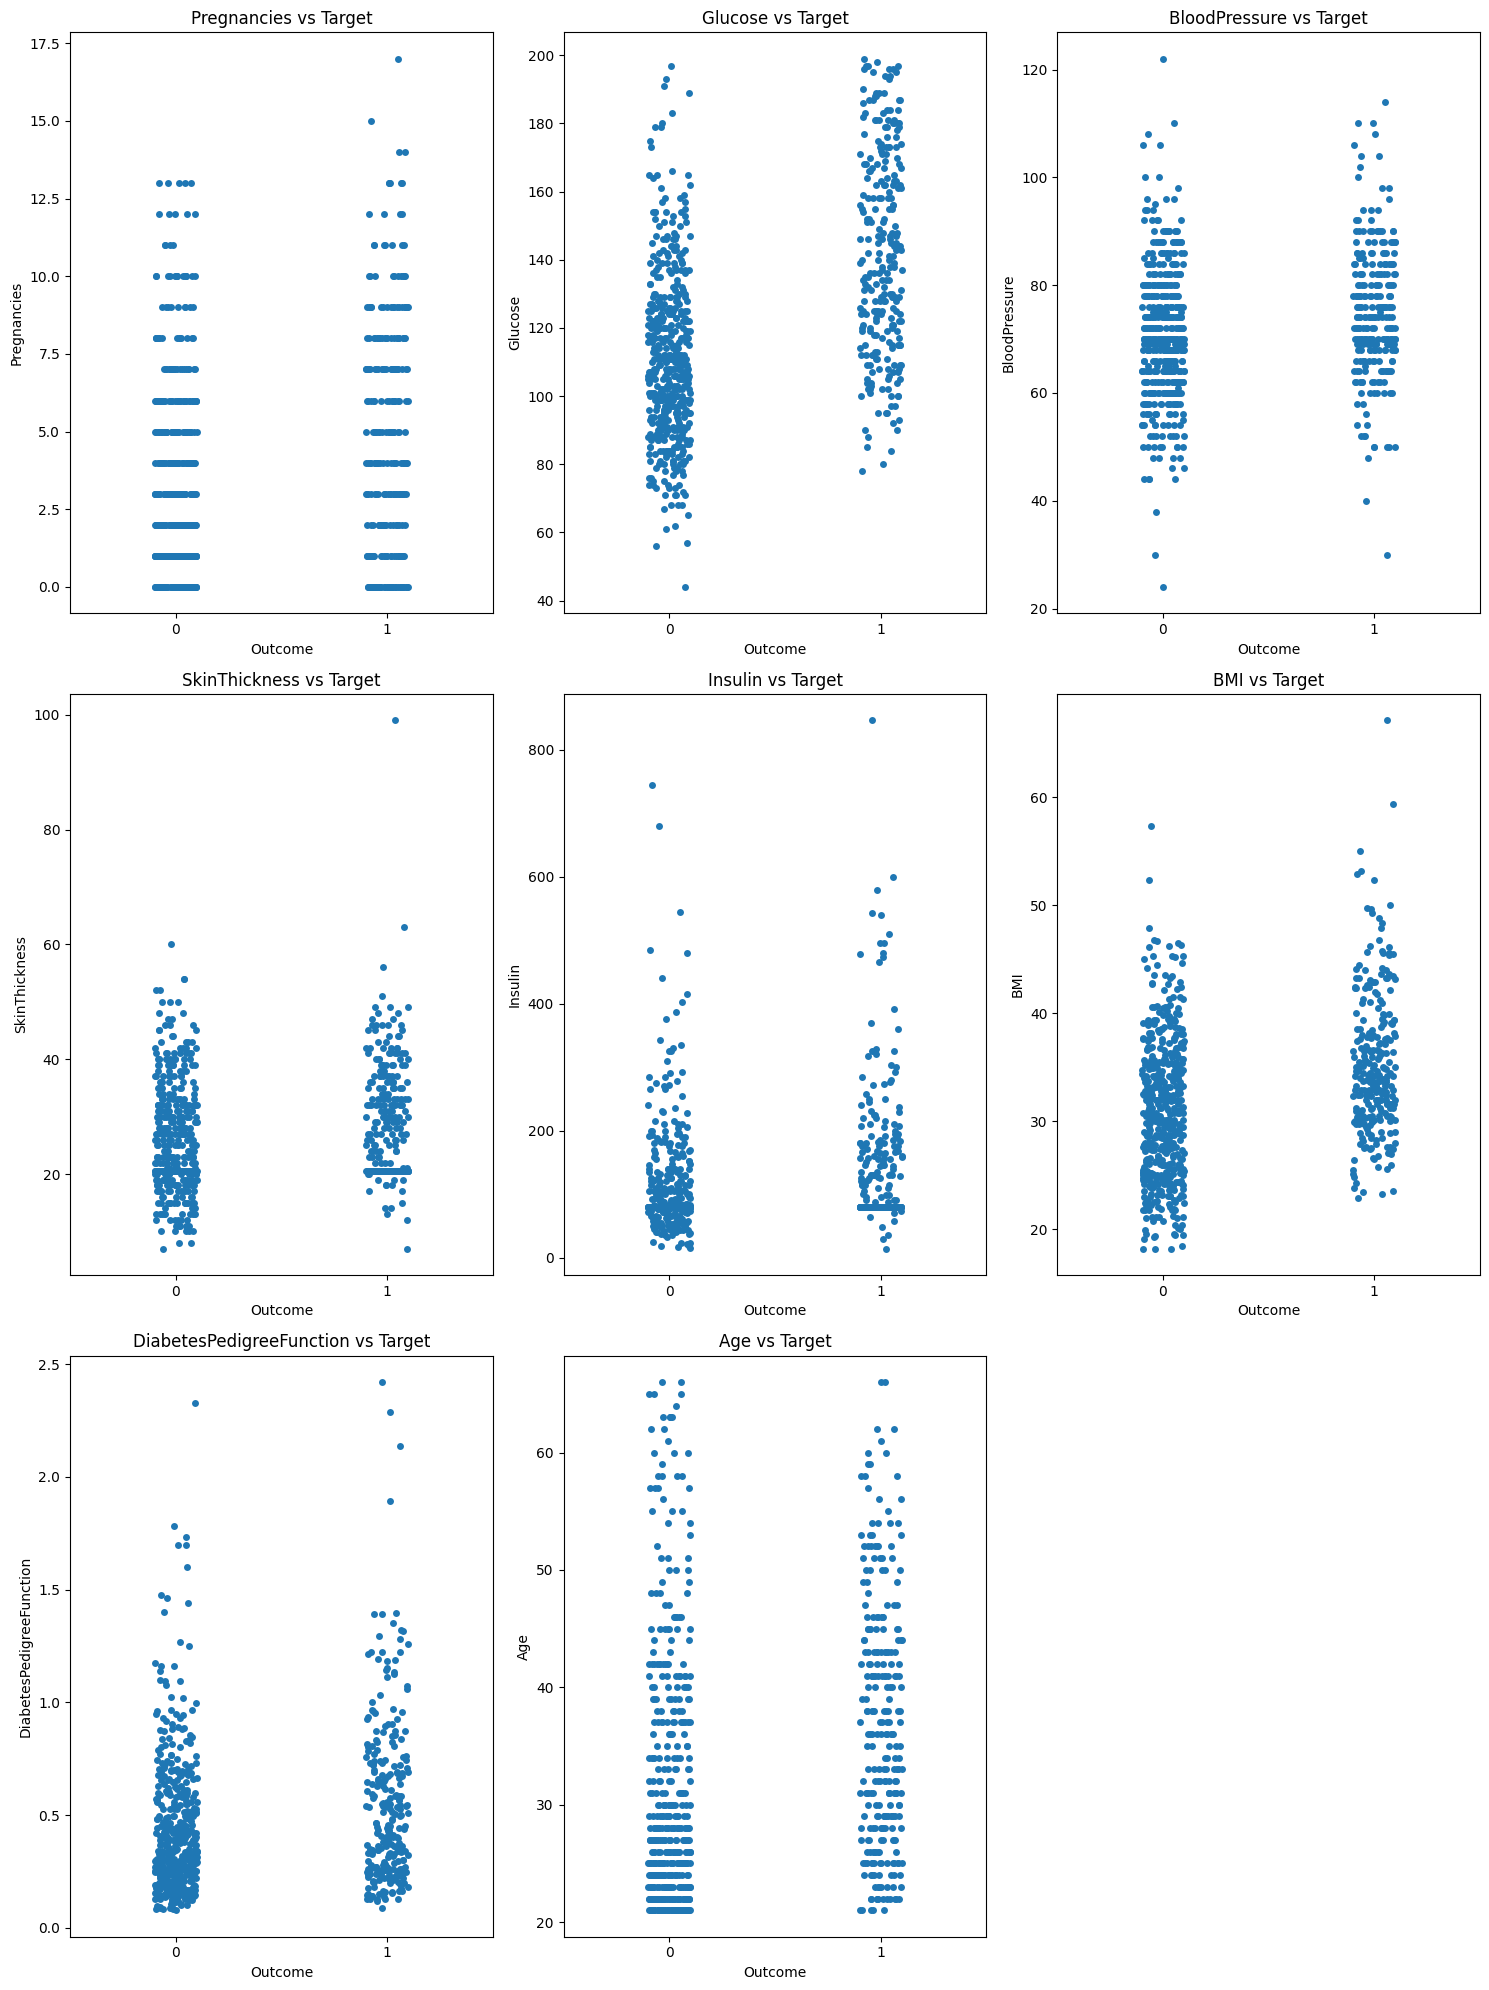

In [573]:
# Assuming 'x' is your features DataFrame and 'y' is your target class
plt.figure(figsize=(15,20))

plotnumber = 1

for column in x.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)  # Swap x and y for correct orientation
        ax.set_title(f'{column} vs Target')
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Multicollinearity

Multicollinearity is a statistical phenomenon in which two or more independent variables (features) in a regression model are highly correlated, meaning one can be linearly predicted from the others with a substantial degree of accuracy. This can cause issues in regression analysis, particularly in linear regression, as it undermines the statistical significance of the independent variables.

### Detecting Multicollinearity
There are several methods to detect multicollinearity:

1. Correlation Matrix:
Calculate the pairwise correlation coefficients between independent variables.
A correlation coefficient close to ±1 indicates high multicollinearity.

2. Variance Inflation Factor (VIF):
VIF quantifies how much the variance of an estimated regression coefficient increases due to multicollinearity.
A VIF value greater than 5 or 10 indicates high multicollinearity.

- Interpretation:

-- VIF = 1: No multicollinearity.

-- VIF > 5: Moderate multicollinearity.

-- VIF > 10: High multicollinearity.

3. Eigenvalues:
If the eigenvalues of the correlation matrix are close to 0, it indicates multicollinearity.

### Handling Multicollinearity
If multicollinearity is detected, you can address it using the following methods:

1. Remove Highly Correlated Features:
Drop one of the highly correlated features based on domain knowledge or statistical measures (e.g., VIF).

2. Combine Features:
Create a new feature by combining correlated features (e.g., taking the average or sum).

3. Principal Component Analysis (PCA):
Use PCA to transform the correlated features into a set of uncorrelated components.

4. Regularization (Ridge Regression):
Use regularization techniques like Ridge Regression to penalize large coefficients and reduce multicollinearity.

5. Increase Sample Size:
Increasing the sample size can sometimes reduce the impact of multicollinearity.

In [580]:
scaler = StandardScaler()

xscaled=scaler.fit_transform(x)

In [582]:
xscaled.shape

(759, 8)

In [592]:
 #Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xscaled,i) for i in range (xscaled.shape[1])]

vif['Features'] = x.columns

In [594]:
vif

,VIF,Features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


Interpretation:

VIF = 1: No multicollinearity.

VIF > 5: Moderate multicollinearity.

VIF > 10: High multicollinearity.

In [600]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled,y,test_size=0.25,random_state=355)

In [602]:
log_reg = LogisticRegression() # For classification tasks

In [606]:
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [608]:
#Lets see how our model performs on the test data set.
ypred=log_reg.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [612]:
# Model Accuracy
accuracy = accuracy_score(ytest,ypred)
accuracy

0.7631578947368421

In [618]:
cm = confusion_matrix(ytest,ypred)
cm

array([[106,  17],
       [ 28,  39]])

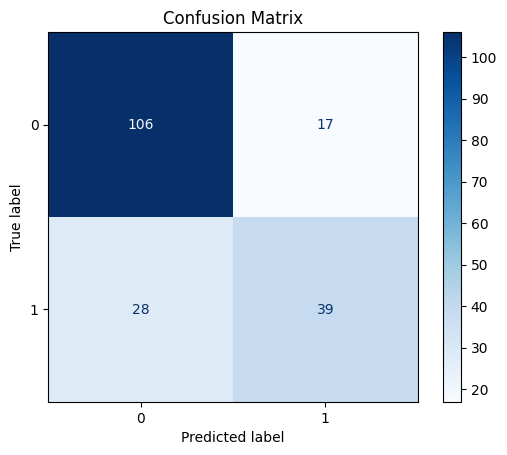

In [630]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()